<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/Sanjushree/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install numpy matplotlib

In [3]:
!pip install seaborn

In [4]:
column_names = [
    'duration', 'protocol_type', 'service', 'flag',
    'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_df = pd.read_csv(
    r"/content/KDDTrain+.txt",
    header=None,
    names=column_names
)

# Drop the 'difficulty' column
train_df.drop(['difficulty'], axis=1, inplace=True)

# Load the testing data
test_df = pd.read_csv(
    r"/content/KDDTest+.txt",
    header=None,
    names=column_names
)


# Drop the 'difficulty' column
test_df.drop(['difficulty'], axis=1, inplace=True)

# Print basic info
print("Training Data")
print(f"Shape: {train_df.shape}")
print(train_df.head())

print("\n--- Testing Data ---")
print(f"Shape: {test_df.shape}")
print(test_df.head())

Training Data
Shape: (125973, 42)
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                  

In [7]:
# Count the occurrences of each attack type in the training dataset
attack_counts = train_df['label'].value_counts().reset_index()
attack_counts.columns = ['attack_type', 'count']

# Display the counts
print(attack_counts)


        attack_type  count
0            normal  67343
1           neptune  41214
2             satan   3633
3           ipsweep   3599
4         portsweep   2931
5             smurf   2646
6              nmap   1493
7              back    956
8          teardrop    892
9       warezclient    890
10              pod    201
11     guess_passwd     53
12  buffer_overflow     30
13      warezmaster     20
14             land     18
15             imap     11
16          rootkit     10
17       loadmodule      9
18        ftp_write      8
19         multihop      7
20              phf      4
21             perl      3
22              spy      2


In [8]:
# Create a binary classification target
train_df['binary'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['binary'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Display first few rows to confirm
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


/tmp/ipython-input-724625224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='pastel')


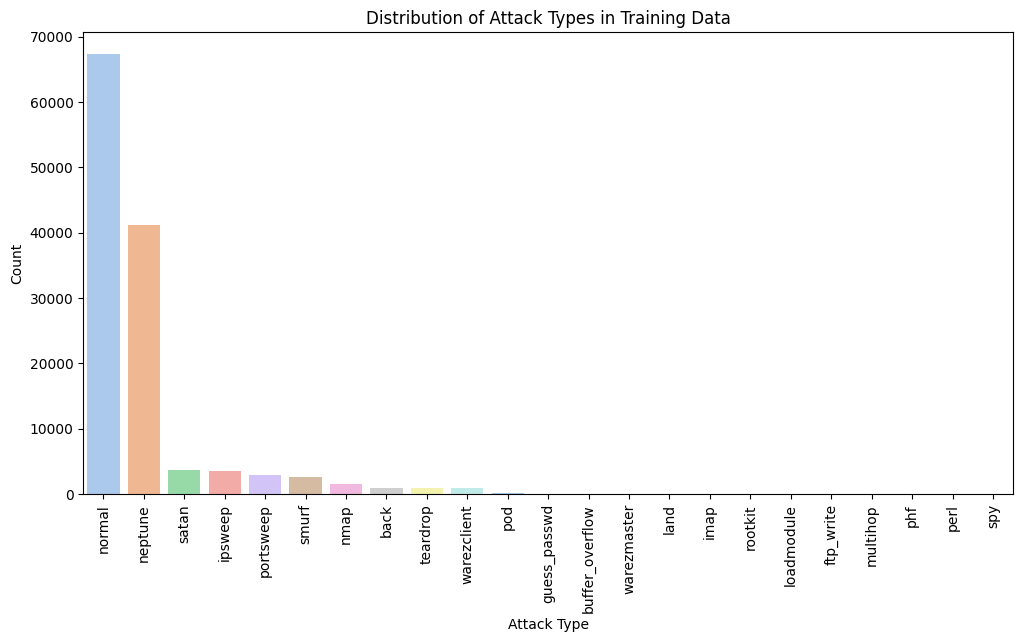


Normal vs Attack Counts:
binary
0    67343
1    58630
Name: count, dtype: int64


In [9]:
# Distribution of attack types
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='pastel')
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

# Display count of attacks vs normal
attack_counts = train_df['binary'].value_counts()
print("\nNormal vs Attack Counts:")
print(attack_counts)
